# The Harmonic Oscillator
## Using Euler's Method

### The Theory

In this project, we simulate the damped and driven harmonic oscillator by means of Euler's method. The differential equation describing the harmonic oscillator of mass $m$ can be derived from Newton's second law,

$ \sum F = m\ddot{x} $.

There are three forces acting on the mass are: <br>
$F_s = -kx$ (the force of the spring is proportional to the diplacement and opposite in direction) <br>
$F_d = -\beta \dot{x}$ (the damping force is proportional to the speed and opposite in direction) <br>
$F = F(t)$ (the driving force is some function of time)

Here, $k$ is the spring constant in units of $[N/m]$, $\beta$ is the damping constant in units of $[N/ms^{-1}]$ and $F(t)$ has units of $[N]$. Plugging these forces into Newton's second law yields

$F(t) - kx - \beta\dot{x} = m\ddot{x}$.

It is often more convenient to move all terms involving $x$ and its derivatives to the left hand side (LHS) and the rest to the right hand side (RHS), giving

$m\ddot{x} + \beta\dot{x} + kx = F(t)$.

It is usually simpler to divide by $m$ to simplify the expression;

$\ddot{x} + \beta/m \dot{x} + k/m x = F(t)/m $.

To simplify further, the following substitutions are performed: <br>
$\beta/m = 2\gamma$ (the factor of 2 simplifies the solution of the DE) <br>
$k/m = \omega_0^2$ (the eigenfrequency of the oscillator) <br>
$F(t)/m = A(t)$ <br>

The resulting DE is

$\ddot{x} + 2\gamma\dot{x} + \omega_0^2 x = A(t) $.

This differential equation can be solved if $F(t)$ and thus $A(t)$ is known.

### Euler's Method
Euler's method for solving a differential equation starts from substituting derivatives of the function by its discrete definition,

$\dot{x} = \frac{x(t + \Delta t) - x(t)}{\Delta t}$.

The second derivative of $x$ can be found by applying the above equation again to $x(t + \Delta t)$ and $x(t)$, yielding

$\ddot{x} = \frac{x(t + \Delta t) - 2x(t) + x(t - \Delta t)}{(\Delta t)^2}$.

Substituting these equations into the original differential equation gives

$\frac{x(t + \Delta t) - 2x(t) + x(t - \Delta t)}{(\Delta t)^2} + 2\gamma \frac{x(t + \Delta t) - x(t)}{\Delta t} + \omega_0^2 x(t) = A(t)$.

The goal is to find $x(t + \Delta t$ when $x(t)$ and $x(t-\Delta t)$ are given. In order to do this, we need to solve for $x(t + \Delta t)$. Doing this yields

$x(t + \Delta t) = \frac{1}{1 + 2\gamma\delta} \left[A(t)(\Delta t)^2 + 2x(t)\left(1 + \gamma\delta - \omega_0^2/2 \right) - x(t-\Delta t) \right]$.

Given two initial conditions, $x(t = 0) = x_0$ and $\dot{x}(t = 0) = v_0$, this can be solved numerically for any $A(t)$.

### Packages

Before the simulation starts, we need to include various packages.

In [4]:
import matplotlib.pyplot as plt     # for plotting
import math                         # for pi etc.

### Parameters

Below is a list of the parameters used in this simulation. A sinusoidal driving force is assumed, with amplitude $F_0$ and frequency $\omega_d$. In this simulation, $\omega_d$ is chosen to be $0.8\cdot\omega$, where $\omega$ is the eigenfrequency of the oscillator.

In [5]:
mass = 2                            # [kg] mass of the oscillator
k = 3                               # [N/m] spring constant of oscillator
d = 0.1                             # [Ns/m] damping constant of oscillator
omega2 = k/mass                     # [1/s²] eigenfrequency of oscillator squared
omega = pow(omega2, 1/2)            # [1/s] eigenfrequency of oscillator
omegad = .8*omega                   # [1/s] driving frequency
F0 = 2                              # [N] driving amplitude

### Simulation Parameters

As well as the physical parameters given above, some parameters regarding the simulation are needed. These are given below. In this list, $N_{freq}$ is the number of time steps per oscillation and $N_{osc}$ is the number of oscillations. It is convenient to separate these parameters, as it makes rescaling the simulation straightforward. The total number of time steps is $N_t$ and it is given by $N_{freq} \cdot N_{osc}$. The time step $dt$ is chosen to be the oscillation period divided by $N_{freq}$. The square of the time step recurs often and is therefore calculated in advance and defined as $dt2$. Lastly, the reduced driving amplitude, $A_0$ is defined as $F_0\cdot (\Delta t)^2/m$.

In [6]:
Nfreq = 50                          # [] Number of timesteps per oscillation
Nosc = 30                           # [] Number of oscillations to simulate
Nt = Nfreq * Nosc                   # [] Number of time steps in total

dt = 2*math.pi / (Nfreq * omega)    # [s] timestep of simulation
dt2 = dt*dt2                        # [s²] timestep squared

A0 = F0*dt2/mass                    # [m] reduced driving amplitude

### Initial Conditions

The initial conditions are specified as $x_i$ and $v_i$, the initial position and velocity respectively.

In [7]:
xi = 1                              # [m] initial displacement
vi = 2                              # [m/s] initial speed

### Arrays

The relevant arrays are specified below. The position array for any time is X and is empty initially. The time array T is immediately filled with all time values. Then the two initial conditions are applied by appending $x_i$ and $x_i + v_i\cdot \Delta t$ respectively.

In [8]:
X = []                              # [m] position list
T = [jj*dt for jj in range(0, Nt)]  # [s] time list

X.append(xi)                        # set first value of X to be the initial position
X.append(X[0] + vi*dt)              # set second value of X to be the initial speed

### Loop

The for-loop is implemented by repeatedly plugging in the equation for $x(t + \Delta t)$. The value of $x(t + \Delta t)$ is appended to the X-array.

In [9]:
for ii in range(1, Nt-1):
    xnew = ((2 - dt2*omega2 - d*dt)*X[ii] - X[ii - 1] + A0*math.cos(omegad*T[ii])) / (1 + d*dt)
    X.append(xnew)

### Plotting

Below is the fragment of code that plots $x$ against $t$. And the result is given below the code fragment.

<ipython-input-10-e98b49d90e60>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)               # for the legend


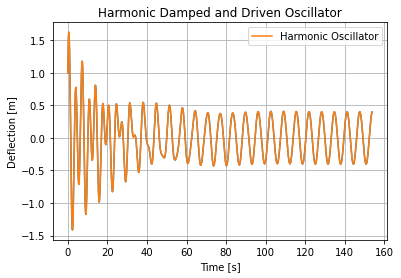

In [10]:
plt.plot(T, X)                      # plot position against time
ax = plt.subplot(111)               # for the legend
ax.plot(T, X, label='Harmonic Oscillator')
plt.title('Harmonic Damped and Driven Oscillator')
plt.xlabel('Time [s]')
plt.ylabel('Deflection [m]')
ax.legend()
plt.grid(True)
plt.show()                          # display plot